In [ ]:
import os
import nibabel as nib
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanIoU
import tensorflow as tf


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_img_dir = '/content/drive/MyDrive/collabdata/archive (4)/imagesTr'
label_img_dir = '/content/drive/MyDrive/collabdata/archive (4)/labelsTr'
test_img_dir = '/content/drive/MyDrive/collabdata/archive (4)/imagesTs'


In [ ]:
from glob import glob

def load_nii_files(image_paths, label_paths=None, resize_shape=(256, 256)):
    images = []
    labels = []

    for img_path in sorted(image_paths):
        img = nib.load(img_path).get_fdata()
        img_slice = img[img.shape[0] // 2]  # middle slice
        img_slice = cv2.resize(img_slice, resize_shape)
        img_slice = img_slice.astype("float32") / 255.
        images.append(img_slice)

    if label_paths:
        for lbl_path in sorted(label_paths):
            lbl = nib.load(lbl_path).get_fdata()
            lbl_slice = lbl[lbl.shape[0] // 2]  # middle slice
            lbl_slice = cv2.resize(lbl_slice, resize_shape)
            lbl_slice = lbl_slice.astype("float32") / 255.
            labels.append(lbl_slice)
        return np.array(images)[..., np.newaxis], np.array(labels)[..., np.newaxis]

    return np.array(images)[..., np.newaxis]

# Define paths
train_img_paths = sorted(glob('/content/training/*.nii.gz'))
label_img_paths = sorted(glob('/content/labels/*.nii.gz'))
test_img_paths = sorted(glob('/content/testing/*.nii.gz'))

# Load train and test data
X, Y = load_nii_files(train_img_paths, label_img_paths)
X_test = load_nii_files(test_img_paths)


ValueError: not enough values to unpack (expected 2, got 0)

In [ ]:
print("Train Images:", len(train_img_paths))
print("Label Images:", len(label_img_paths))
print("Test Images:", len(test_img_paths))

Train Images: 0
Label Images: 0
Test Images: 0


In [ ]:
from glob import glob

base_path = '/content/drive/MyDrive/collabdata/Archive (4)'

train_img_paths = sorted(glob(base_path + '/imagesTr/*.nii'))
label_img_paths = sorted(glob(base_path + '/labelsTr/*.nii'))
test_img_paths  = sorted(glob(base_path + '/imagesTs/*.nii'))

print("Train Images:", len(train_img_paths))
print("Label Images:", len(label_img_paths))
print("Test Images:", len(test_img_paths))


Train Images: 0
Label Images: 0
Test Images: 0


In [ ]:
import os

base_path = '/content/drive/MyDrive/collabdata/archive (4)'

print("imagesTr:", os.listdir(os.path.join(base_path, 'imagesTr')))
print("labelsTr:", os.listdir(os.path.join(base_path, 'labelsTr')))
print("imagesTs:", os.listdir(os.path.join(base_path, 'imagesTs')))


imagesTr: ['la_004.nii', 'la_003.nii', 'la_005.nii', 'la_007.nii', 'la_009.nii', 'la_010.nii', 'la_011.nii', 'la_016.nii', 'la_014.nii', 'la_017.nii', 'la_018.nii', 'la_019.nii', 'la_020.nii', 'la_022.nii', 'la_021.nii', 'la_023.nii', 'la_024.nii', 'la_026.nii', 'la_029.nii', 'la_030.nii']
labelsTr: ['la_003.nii', 'la_004.nii', 'la_010.nii', 'la_014.nii', 'la_005.nii', 'la_009.nii', 'la_011.nii', 'la_017.nii', 'la_007.nii', 'la_018.nii', 'la_016.nii', 'la_022.nii', 'la_021.nii', 'la_024.nii', 'la_019.nii', 'la_023.nii', 'la_020.nii', 'la_029.nii', 'la_026.nii', 'la_030.nii']
imagesTs: ['la_002.nii', 'la_001.nii', 'la_006.nii', 'la_008.nii', 'la_012.nii', 'la_013.nii', 'la_015.nii', 'la_025.nii', 'la_027.nii', 'la_028.nii']


In [ ]:
from glob import glob
import os

base_path = '/content/drive/MyDrive/collabdata/archive (4)'

train_img_paths = sorted(glob(os.path.join(base_path, 'imagesTr', '*.nii')))
label_img_paths = sorted(glob(os.path.join(base_path, 'labelsTr', '*.nii')))
test_img_paths  = sorted(glob(os.path.join(base_path, 'imagesTs', '*.nii')))

print("Train Images:", len(train_img_paths))
print("Label Images:", len(label_img_paths))
print("Test Images:", len(test_img_paths))


Train Images: 20
Label Images: 20
Test Images: 10


In [ ]:
import nibabel as nib
import numpy as np

def load_nii_data(image_paths, label_paths):
    images = []
    labels = []

    for img_path, lbl_path in zip(sorted(image_paths), sorted(label_paths)):
        img = nib.load(img_path).get_fdata()
        lbl = nib.load(lbl_path).get_fdata()

        if img.shape != lbl.shape:
            print(f"Shape mismatch for: {os.path.basename(img_path)}")
            continue

        images.append(img)
        labels.append(lbl)

    return np.array(images), np.array(labels)


In [ ]:
X, Y = load_nii_data(train_img_paths, label_img_paths)
print("X shape (images):", X.shape)
print("Y shape (labels):", Y.shape)


KeyboardInterrupt: 

In [ ]:
def load_nii_data_2d(image_paths, label_paths):
    image_slices = []
    label_slices = []

    for img_path, lbl_path in zip(sorted(image_paths), sorted(label_paths)):
        img = nib.load(img_path).get_fdata()
        lbl = nib.load(lbl_path).get_fdata()

        if img.shape != lbl.shape:
            print(f"Shape mismatch: {img_path}")
            continue

        # Extract middle 50% of slices to avoid too black/empty ones
        start = img.shape[0] // 4
        end = img.shape[0] * 3 // 4

        for i in range(start, end):
            image_slices.append(img[i, :, :])
            label_slices.append(lbl[i, :, :])

    return np.array(image_slices), np.array(label_slices)


In [ ]:
X, Y = load_nii_data_2d(train_img_paths, label_img_paths)
print("X shape:", X.shape)
print("Y shape:", Y.shape)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (3200, 320) + inhomogeneous part.

In [ ]:
!pip install scikit-image


In [ ]:
from skimage.transform import resize

def load_nii_data_2d(image_paths, label_paths, target_size=(320, 320)):
    image_slices = []
    label_slices = []

    for img_path, lbl_path in zip(sorted(image_paths), sorted(label_paths)):
        img = nib.load(img_path).get_fdata()
        lbl = nib.load(lbl_path).get_fdata()

        if img.shape != lbl.shape:
            print(f"Shape mismatch: {img_path}")
            continue

        start = img.shape[0] // 4
        end = img.shape[0] * 3 // 4

        for i in range(start, end):
            img_slice = resize(img[i, :, :], target_size, preserve_range=True)
            lbl_slice = resize(lbl[i, :, :], target_size, preserve_range=True, order=0)  # nearest-neighbor for labels

            image_slices.append(img_slice)
            label_slices.append(lbl_slice)

    return np.array(image_slices), np.array(label_slices)


In [ ]:
X, Y = load_nii_data_2d(train_img_paths, label_img_paths)
print("X shape:", X.shape)
print("Y shape:", Y.shape)


In [ ]:
def load_nii_data_2d(image_paths, label_paths, target_size=(320, 320), max_slices=32):
    from skimage.transform import resize

    image_slices = []
    label_slices = []

    for img_path, lbl_path in zip(sorted(image_paths), sorted(label_paths)):
        img = nib.load(img_path).get_fdata()
        lbl = nib.load(lbl_path).get_fdata()

        if img.shape != lbl.shape:
            print(f"Shape mismatch: {img_path}")
            continue

        center = img.shape[0] // 2
        start = max(0, center - max_slices // 2)
        end = min(img.shape[0], center + max_slices // 2)

        for i in range(start, end):
            img_slice = resize(img[i, :, :], target_size, preserve_range=True)
            lbl_slice = resize(lbl[i, :, :], target_size, preserve_range=True, order=0)

            image_slices.append(img_slice)
            label_slices.append(lbl_slice)

    return np.array(image_slices), np.array(label_slices)


In [ ]:
X, Y = load_nii_data_2d(train_img_paths, label_img_paths)
print("X shape:", X.shape)
print("Y shape:", Y.shape)


X shape: (640, 320, 320)
Y shape: (640, 320, 320)


In [ ]:
# Normalize images to [0, 1]
X = X / np.max(X)

# Convert masks to binary
Y = (Y > 0).astype(np.float32)


In [ ]:
X = np.expand_dims(X, axis=-1)  # shape becomes (640, 320, 320, 1)
Y = np.expand_dims(Y, axis=-1)  # same for masks


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

print("Train images:", X_train.shape)
print("Val images:", X_val.shape)


Train images: (512, 320, 320, 1)
Val images: (128, 320, 320, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def unet_model(input_size=(320, 320, 1)):
    inputs = layers.Input(input_size)

    # Encoder
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    c1 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c1)
    p1 = layers.MaxPooling2D((2, 2))(c1)

    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(p1)
    c2 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c2)
    p2 = layers.MaxPooling2D((2, 2))(c2)

    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(p2)
    c3 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c3)
    p3 = layers.MaxPooling2D((2, 2))(c3)

    # Bottleneck
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(p3)
    c4 = layers.Conv2D(256, (3, 3), activation='relu', padding='same')(c4)

    # Decoder
    u5 = layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = layers.concatenate([u5, c3])
    c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(u5)
    c5 = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(c5)

    u6 = layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = layers.concatenate([u6, c2])
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(u6)
    c6 = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(c6)

    u7 = layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = layers.concatenate([u7, c1])
    c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(u7)
    c7 = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(c7)

    outputs = layers.Conv2D(1, (1, 1), activation='sigmoid')(c7)

    model = models.Model(inputs, outputs)
    return model


In [ ]:
def dice_coef(y_true, y_pred, smooth=1):
    y_true_f = tf.keras.backend.flatten(y_true)
    y_pred_f = tf.keras.backend.flatten(y_pred)
    intersection = tf.keras.backend.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.keras.backend.sum(y_true_f) + tf.keras.backend.sum(y_pred_f) + smooth)

model = unet_model()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[dice_coef])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 320, 320,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 320, 320,  │        320 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 320, 320,  │      9,248 │ conv2d[0][0]      │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 160, 160,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 160, 160,  │     18,496 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 160, 160,  │     36,928 │ conv2d_2[0][0]    │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 80, 80,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 80, 80,    │     73,856 │ max_pooling2d_1[… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 80, 80,    │    147,584 │ conv2d_4[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 40, 40,    │          0 │ conv2d_5[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 40, 40,    │    295,168 │ max_pooling2d_2[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 40, 40,    │    590,080 │ conv2d_6[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose    │ (None, 80, 80,    │    131,200 │ conv2d_7[0][0]    │
│ (Conv2DTranspose)   │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 80, 80,    │          0 │ conv2d_transpose… │
│ (Concatenate)       │ 256)              │            │ conv2d_5[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 80, 80,    │    295,040 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_9 (Conv2D)   │ (None, 80, 80,    │    147,584 │ conv2d_8[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_transpose_1  │ (None, 160, 160,  │     32,832 │ conv2d_9[0][0]  

 Total params: 1,925,025 (7.34 MB)

 Trainable params: 1,925,025 (7.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=15,
    batch_size=8
)


Epoch 1/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 50s 355ms/step - dice_coef: 0.0406 - loss: 0.3872 - val_dice_coef: 0.2007 - val_loss: 0.0869
Epoch 2/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 50s 202ms/step - dice_coef: 0.1717 - loss: 0.0749 - val_dice_coef: 0.2417 - val_loss: 0.0741
Epoch 3/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - dice_coef: 0.2537 - loss: 0.0719 - val_dice_coef: 0.2619 - val_loss: 0.0901
Epoch 4/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 208ms/step - dice_coef: 0.3437 - loss: 0.0640 - val_dice_coef: 0.5596 - val_loss: 0.0524
Epoch 5/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 207ms/step - dice_coef: 0.5123 - loss: 0.0485 - val_dice_coef: 0.6410 - val_loss: 0.0406
Epoch 6/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 14s 213ms/step - dice_coef: 0.5806 - loss: 0.0384 - val_dice_coef: 0.6710 - val_loss: 0.0332
Epoch 7/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 20s 205ms/step - dice_coef: 0.6914 - loss: 0.0284 - val_dice_coef: 0.7067 - val_loss: 0.0340
Epoch 8/15
64/64 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - dice_coef: 0.7182 - loss: 0.

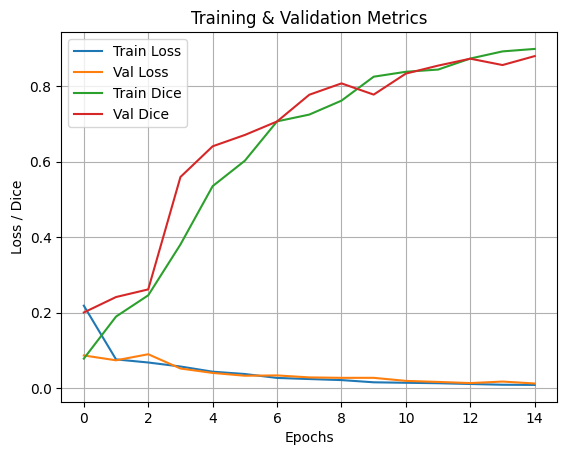

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.plot(history.history['dice_coef'], label='Train Dice')
plt.plot(history.history['val_dice_coef'], label='Val Dice')
plt.legend()
plt.title("Training & Validation Metrics")
plt.xlabel("Epochs")
plt.ylabel("Loss / Dice")
plt.grid()
plt.show()


In [ ]:
# Predict on validation data
preds = model.predict(X_val)

# Apply threshold to get binary mask
preds_thresholded = (preds > 0.5).astype(np.uint8)


4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 229ms/step


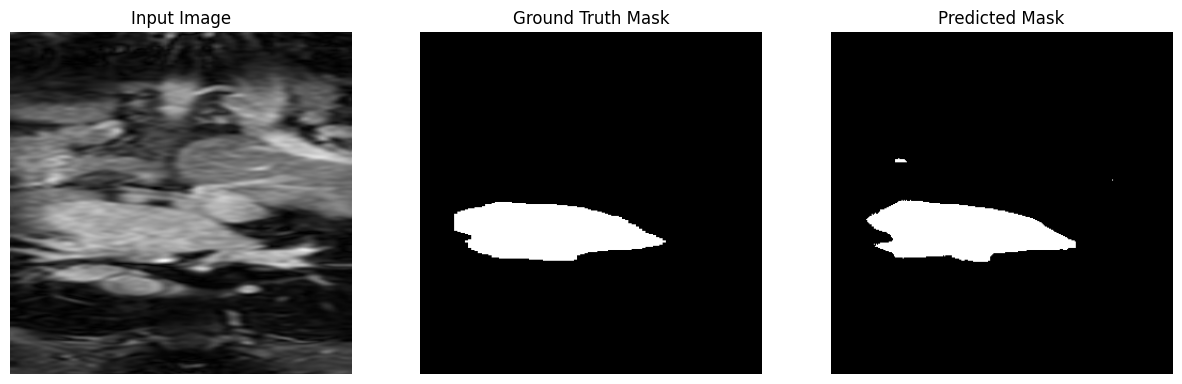

In [ ]:
import random

n = random.randint(0, len(X_val) - 1)  # random index

plt.figure(figsize=(15, 5))

# Input image
plt.subplot(1, 3, 1)
plt.imshow(X_val[n].squeeze(), cmap='gray')
plt.title('Input Image')
plt.axis('off')

# Ground Truth
plt.subplot(1, 3, 2)
plt.imshow(Y_val[n].squeeze(), cmap='gray')
plt.title('Ground Truth Mask')
plt.axis('off')

# Predicted Mask
plt.subplot(1, 3, 3)
plt.imshow(preds_thresholded[n].squeeze(), cmap='gray')
plt.title('Predicted Mask')
plt.axis('off')

plt.show()


In [ ]:
# Load test images and convert to 2D slices
def load_test_data_2d(test_image_paths):
    image_slices = []

    for path in test_image_paths:
        img = nib.load(path).get_fdata()
        img = (img - img.min()) / (img.max() - img.min())  # normalize

        for i in range(img.shape[0]):
            slice_ = img[i, :, :]
            if slice_.shape == (320, 320):
                image_slices.append(slice_)

    return np.expand_dims(np.array(image_slices), axis=-1)

X_test = load_test_data_2d(test_img_paths)
print("Test shape:", X_test.shape)


Test shape: (0, 1)


In [ ]:
preds_test = model.predict(X_test)
preds_test_thresholded = (preds_test > 0.5).astype(np.uint8)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


ValueError: math domain error

In [ ]:
import os
import glob

base_path = "/content/drive/MyDrive/collabdata/archive (4)"
test_image_dir = os.path.join(base_path, "imagesTs")

# Make sure this finds 10 files
test_img_paths = sorted(glob.glob(os.path.join(test_image_dir, "*.nii")))
print("Found test images:", len(test_img_paths))


Found test images: 10


In [ ]:
import nibabel as nib
import numpy as np

def load_test_data_2d(test_image_paths):
    image_slices = []

    for path in test_image_paths:
        img = nib.load(path).get_fdata()
        img = (img - img.min()) / (img.max() - img.min())  # normalize

        # Safety check: ensure correct shape
        for i in range(img.shape[0]):
            slice_ = img[i, :, :]
            if slice_.shape == (320, 320):
                image_slices.append(slice_)

    image_slices = np.array(image_slices)

    # Final shape should be (num_slices, 320, 320, 1)
    return np.expand_dims(image_slices, axis=-1)

X_test = load_test_data_2d(test_img_paths)
print("Test shape:", X_test.shape)


Test shape: (0, 1)


In [ ]:
import nibabel as nib
import numpy as np
import cv2  # For resizing

def load_test_data_2d(test_image_paths):
    image_slices = []

    for path in test_image_paths:
        img = nib.load(path).get_fdata()
        print(f"{path} -> shape: {img.shape}")

        # Normalize
        img = (img - img.min()) / (img.max() - img.min())

        # Loop over slices
        for i in range(img.shape[0]):
            slice_ = img[i, :, :]

            # Resize slice if not 320x320
            if slice_.shape != (320, 320):
                slice_ = cv2.resize(slice_, (320, 320), interpolation=cv2.INTER_LINEAR)

            image_slices.append(slice_)

    image_slices = np.array(image_slices)
    return np.expand_dims(image_slices, axis=-1)  # (N, 320, 320, 1)

X_test = load_test_data_2d(test_img_paths)
print("Test shape:", X_test.shape)


/content/drive/MyDrive/collabdata/archive (4)/imagesTs/la_001.nii -> shape: (400, 400, 180)
/content/drive/MyDrive/collabdata/archive (4)/imagesTs/la_002.nii -> shape: (320, 320, 140)
/content/drive/MyDrive/collabdata/archive (4)/imagesTs/la_006.nii -> shape: (400, 400, 180)
/content/drive/MyDrive/collabdata/archive (4)/imagesTs/la_008.nii -> shape: (320, 320, 110)
/content/drive/MyDrive/collabdata/archive (4)/imagesTs/la_012.nii -> shape: (320, 320, 137)
/content/drive/MyDrive/collabdata/archive (4)/imagesTs/la_013.nii -> shape: (320, 320, 120)
/content/drive/MyDrive/collabdata/archive (4)/imagesTs/la_015.nii -> shape: (320, 320, 100)
/content/drive/MyDrive/collabdata/archive (4)/imagesTs/la_025.nii -> shape: (320, 320, 120)
/content/drive/MyDrive/collabdata/archive (4)/imagesTs/la_027.nii -> shape: (320, 320, 100)
/content/drive/MyDrive/collabdata/archive (4)/imagesTs/la_028.nii -> shape: (320, 320, 110)
Test shape: (3360, 320, 320, 1)


In [ ]:
preds_test = model.predict(X_test, batch_size=1)  # Optional: adjust batch size to avoid memory issues
preds_test_thresholded = (preds_test > 0.5).astype(np.uint8)


3360/3360 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step


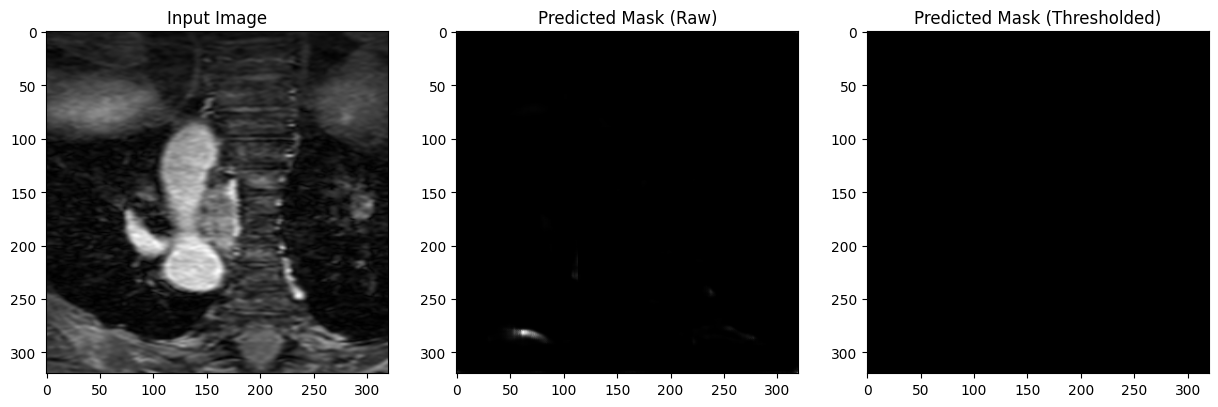

In [ ]:
import matplotlib.pyplot as plt

def display_sample(i):
    plt.figure(figsize=(15, 5))

    # Original image
    plt.subplot(1, 3, 1)
    plt.imshow(X_test[i].squeeze(), cmap='gray')
    plt.title("Input Image")

    # Predicted mask
    plt.subplot(1, 3, 2)
    plt.imshow(preds_test[i].squeeze(), cmap='gray')
    plt.title("Predicted Mask (Raw)")

    # Thresholded mask
    plt.subplot(1, 3, 3)
    plt.imshow(preds_test_thresholded[i].squeeze(), cmap='gray')
    plt.title("Predicted Mask (Thresholded)")

    plt.show()

# Try for a few indices like 0, 50, 100
display_sample(150)


128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


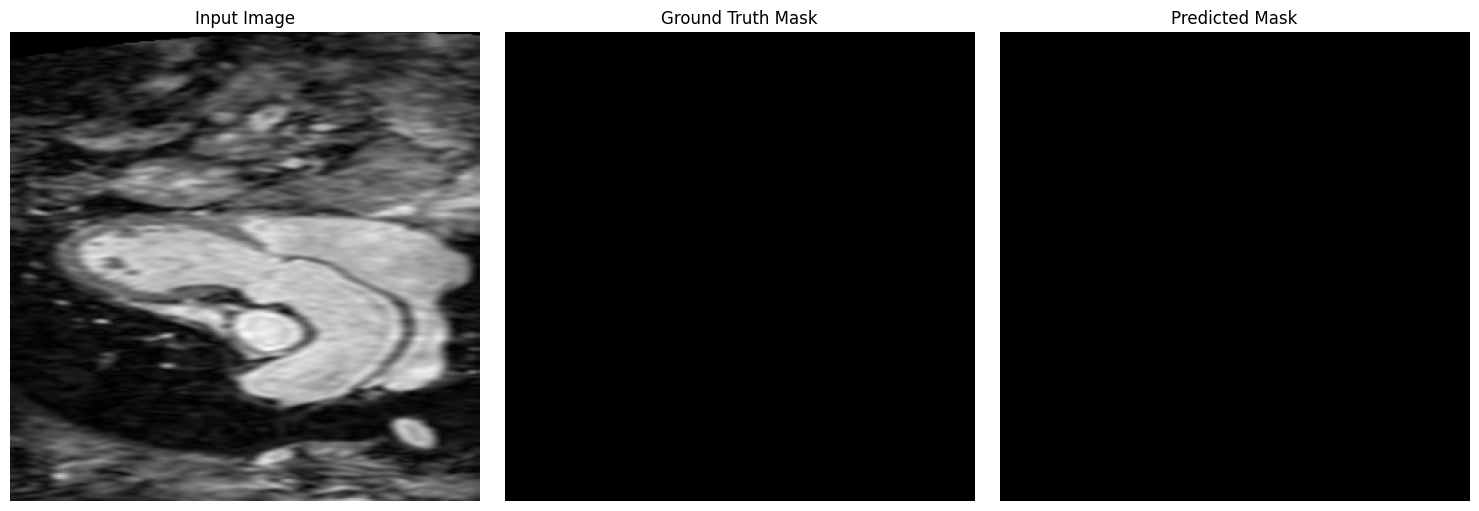

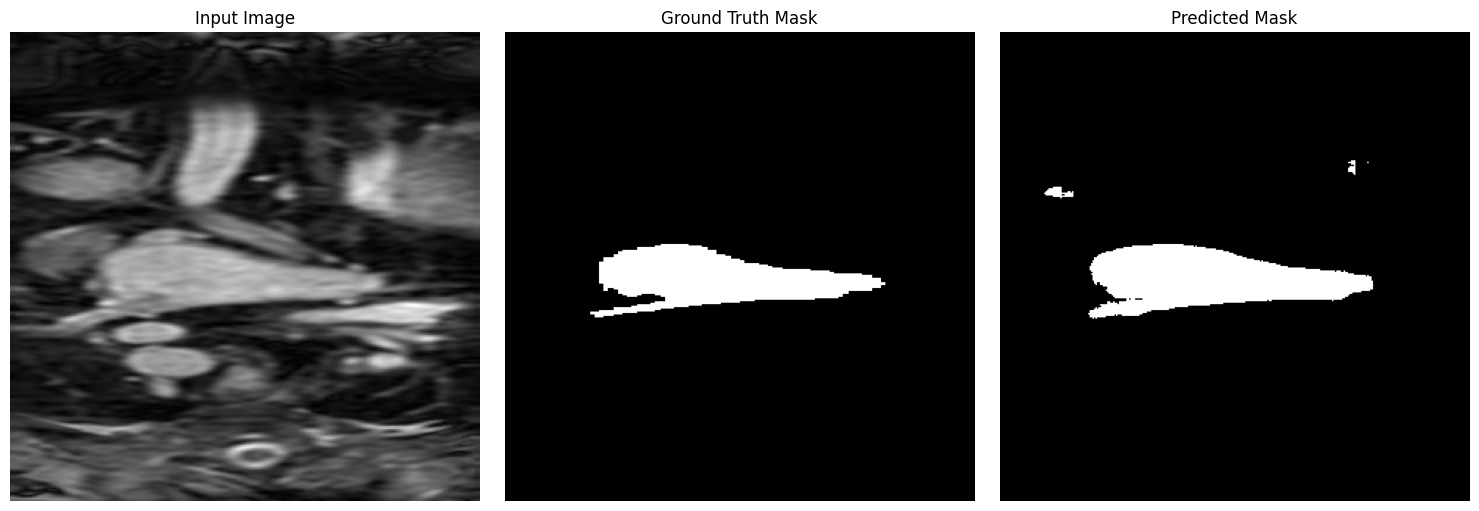

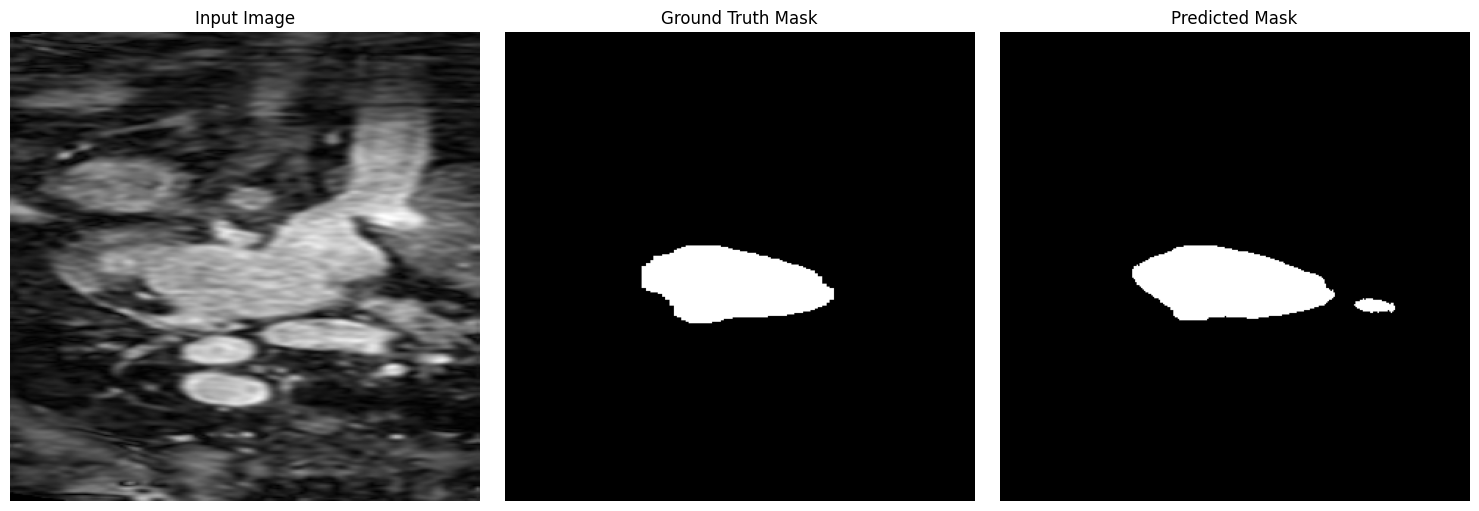

In [ ]:
# Predict on validation set (if not done already)
preds_val = model.predict(X_val, batch_size=1)
preds_val_thresholded = (preds_val > 0.5).astype(np.uint8)

# Function to display input, ground truth, and prediction
def show_val_comparison(index):
    image = X_val[index].squeeze()
    ground_truth = Y_val[index].squeeze()
    prediction = preds_val_thresholded[index].squeeze()

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Input Image")
    plt.axis("off")

    plt.subplot(1, 3, 2)
    plt.imshow(ground_truth, cmap='gray')
    plt.title("Ground Truth Mask")
    plt.axis("off")

    plt.subplot(1, 3, 3)
    plt.imshow(prediction, cmap='gray')
    plt.title("Predicted Mask")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

# Try it on a few slices
show_val_comparison(0)
show_val_comparison(10)
show_val_comparison(20)


In [ ]:
def dice_coefficient(y_true, y_pred):
    smooth = 1e-6  # To avoid division by zero
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (np.sum(y_true_f) + np.sum(y_pred_f) + smooth)

# Compute Dice scores for all validation images
dice_scores = [dice_coefficient(Y_val[i], preds_val_thresholded[i]) for i in range(len(Y_val))]
print("Mean Dice Coefficient on Validation Set:", np.mean(dice_scores))


Mean Dice Coefficient on Validation Set: 0.7422856860549075


In [ ]:
def iou_score(y_true, y_pred):
    smooth = 1e-6
    y_true_f = y_true.flatten()
    y_pred_f = y_pred.flatten()
    intersection = np.sum(y_true_f * y_pred_f)
    union = np.sum(y_true_f) + np.sum(y_pred_f) - intersection
    return (intersection + smooth) / (union + smooth)

iou_scores = [iou_score(Y_val[i], preds_val_thresholded[i]) for i in range(len(Y_val))]
print("Mean IoU on Validation Set:", np.mean(iou_scores))


Mean IoU on Validation Set: 0.6955427356185591


In [ ]:
import nibabel as nib
import os

# Output directory to save .nii predictions
save_dir = '/content/drive/MyDrive/collabdata/archive (4)/predicted_masks/'
os.makedirs(save_dir, exist_ok=True)

# Reload test paths to keep the filenames
test_img_filenames = sorted(os.listdir(test_img_dir))  # e.g., ['la_001.nii', ...]

for i, filename in enumerate(test_img_filenames):
    # Get shape of original .nii
    test_img_path = os.path.join(test_img_dir, filename)
    orig_nii = nib.load(test_img_path)
    affine = orig_nii.affine
    header = orig_nii.header

    # Get number of slices in this image
    num_slices = orig_nii.shape[2]


    # Extract corresponding predicted slices
    pred_volume = preds_test_thresholded[i*num_slices:(i+1)*num_slices]
    pred_volume = np.squeeze(np.transpose(pred_volume, (1, 2, 0)))  # (320, 320, N)

    # Save as .nii
    pred_nii = nib.Nifti1Image(pred_volume.astype(np.uint8), affine, header)
    nib.save(pred_nii, os.path.join(save_dir, f'pred_{filename}'))

    print(f"Saved prediction for {filename} → pred_{filename}")


ValueError: axes don't match array

In [ ]:
print(f"pred_volume shape before transpose: {pred_volume.shape}")


pred_volume shape before transpose: (180, 320, 320, 1)


In [ ]:
print(f"{filename} has {num_slices} slices, extracting from index {i*num_slices} to {(i+1)*num_slices}")


la_001.nii has 180 slices, extracting from index 0 to 180


In [ ]:
import os
import nibabel as nib
import numpy as np

# Create predictions folder if it doesn't exist
os.makedirs("/content/drive/MyDrive/collabdata/predictions", exist_ok=True)

start = 0
for i, (filename, shape) in enumerate(zip(test_filenames, test_shapes)):
    num_slices = shape[2]  # Depth along z-axis (e.g., 180)

    print(f"{filename} has {num_slices} slices, extracting from index {start} to {start + num_slices}")

    # Extract slices for one volume
    pred_volume = preds_test_thresholded[start:start + num_slices]  # shape (slices, 320, 320, 1)

    # ✅ Fix shape
    pred_volume = np.squeeze(pred_volume)                           # (slices, 320, 320)
    pred_volume = np.transpose(pred_volume, (1, 2, 0))              # (320, 320, slices)

    # Save as .nii file
    pred_nii = nib.Nifti1Image(pred_volume, affine=np.eye(4))
    nib.save(pred_nii, f"/content/drive/MyDrive/collabdata/predictions/{filename}")

    start += num_slices


NameError: name 'test_filenames' is not defined

In [ ]:
import nibabel as nib
import os

# Directory for test images
test_dir = "/content/drive/MyDrive/collabdata/archive (4)/imagesTs"

# Get sorted list of test filenames
test_filenames = sorted(os.listdir(test_dir))

# Get shape info for each test image
test_shapes = []
for fname in test_filenames:
    img_path = os.path.join(test_dir, fname)
    img = nib.load(img_path)
    shape = img.get_fdata().shape  # (x, y, z)
    test_shapes.append(shape)


In [ ]:
import os
import nibabel as nib
import numpy as np

# Create predictions folder if it doesn't exist
os.makedirs("/content/drive/MyDrive/collabdata/predictions", exist_ok=True)

start = 0
for i, (filename, shape) in enumerate(zip(test_filenames, test_shapes)):
    num_slices = shape[2]  # Depth along z-axis (e.g., 180)

    print(f"{filename} has {num_slices} slices, extracting from index {start} to {start + num_slices}")

    # Extract slices for one volume
    pred_volume = preds_test_thresholded[start:start + num_slices]  # shape (slices, 320, 320, 1)

    # ✅ Fix shape
    pred_volume = np.squeeze(pred_volume)                           # (slices, 320, 320)
    pred_volume = np.transpose(pred_volume, (1, 2, 0))              # (320, 320, slices)

    # Save as .nii file
    pred_nii = nib.Nifti1Image(pred_volume, affine=np.eye(4))
    nib.save(pred_nii, f"/content/drive/MyDrive/collabdata/predictions/{filename}")

    start += num_slices


la_001.nii has 180 slices, extracting from index 0 to 180
la_002.nii has 140 slices, extracting from index 180 to 320
la_006.nii has 180 slices, extracting from index 320 to 500
la_008.nii has 110 slices, extracting from index 500 to 610
la_012.nii has 137 slices, extracting from index 610 to 747
la_013.nii has 120 slices, extracting from index 747 to 867
la_015.nii has 100 slices, extracting from index 867 to 967
la_025.nii has 120 slices, extracting from index 967 to 1087
la_027.nii has 100 slices, extracting from index 1087 to 1187
la_028.nii has 110 slices, extracting from index 1187 to 1297


In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt

# Choose a test file
test_file = 'la_001.nii'
image_path = f'/content/drive/MyDrive/collabdata/archive (4)/imagesTs/{test_file}'
pred_path = f'/content/predicted_nii/{test_file}'

# Load image and predicted mask
image_nii = nib.load(image_path)
image_data = image_nii.get_fdata()

pred_nii = nib.load(pred_path)
pred_data = pred_nii.get_fdata()

# Visualize a few slices
slices_to_show = [image_data.shape[2] // 3, image_data.shape[2] // 2, 2 * image_data.shape[2] // 3]

for i, slice_idx in enumerate(slices_to_show):
    plt.figure(figsize=(8, 4))

    # Original slice
    plt.subplot(1, 2, 1)
    plt.imshow(image_data[:, :, slice_idx], cmap='gray')
    plt.title(f'Original Image\nSlice {slice_idx}')
    plt.axis('off')

    # Predicted mask slice
    plt.subplot(1, 2, 2)
    plt.imshow(pred_data[:, :, slice_idx], cmap='gray')
    plt.title(f'Predicted Mask\nSlice {slice_idx}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


FileNotFoundError: No such file or no access: '/content/predicted_nii/la_001.nii'

Image shape: (320, 320, 110)
Predicted mask shape: (320, 320, 110)


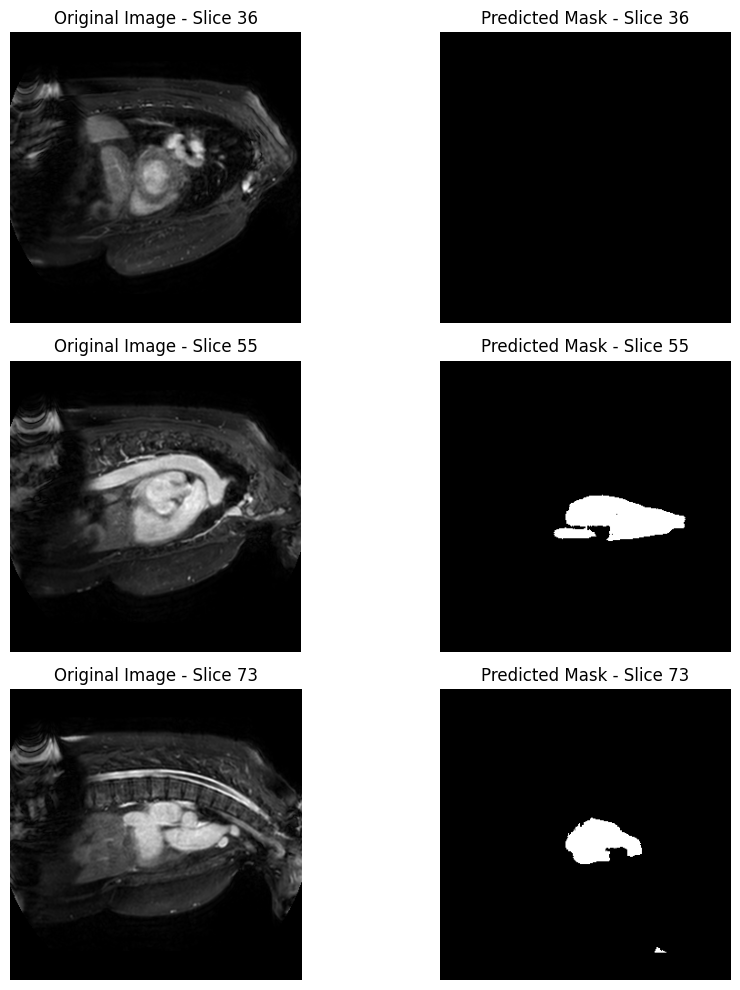

In [ ]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Set paths for one test image and its prediction
test_img_path = "/content/drive/MyDrive/collabdata/archive (4)/imagesTs/la_008.nii"
pred_path = "/content/drive/MyDrive/collabdata/predictions/la_008.nii"

# Load both
img = nib.load(test_img_path).get_fdata()
pred = nib.load(pred_path).get_fdata()

# Confirm shapes
print("Image shape:", img.shape)
print("Predicted mask shape:", pred.shape)

# Choose middle 3 slices to view
slices = [img.shape[2] // 3, img.shape[2] // 2, 2 * img.shape[2] // 3]

# Plot side-by-side
fig, axs = plt.subplots(len(slices), 2, figsize=(10, 10))

for i, slice_idx in enumerate(slices):
    axs[i, 0].imshow(img[:, :, slice_idx], cmap='gray')
    axs[i, 0].set_title(f'Original Image - Slice {slice_idx}')
    axs[i, 0].axis('off')

    axs[i, 1].imshow(pred[:, :, slice_idx], cmap='gray')
    axs[i, 1].set_title(f'Predicted Mask - Slice {slice_idx}')
    axs[i, 1].axis('off')

plt.tight_layout()
plt.show()


In [ ]:
model.save("la_segmentation_model.h5")


In [ ]:
model.save("la_segmentation_model.keras")


In [ ]:
!zip -r la_segmentation_results.zip predictions la_segmentation_model.keras


	zip warning: name not matched: predictions
  adding: la_segmentation_model.keras (deflated 8%)


In [ ]:
!zip -r /content/la_segmentation_results.zip "/content/drive/MyDrive/collabdata/predictions" la_segmentation_model.keras


updating: la_segmentation_model.keras (deflated 8%)
  adding: content/drive/MyDrive/collabdata/predictions/ (stored 0%)
  adding: content/drive/MyDrive/collabdata/predictions/la_001.nii (deflated 100%)
  adding: content/drive/MyDrive/collabdata/predictions/la_002.nii (deflated 100%)
  adding: content/drive/MyDrive/collabdata/predictions/la_006.nii (deflated 100%)
  adding: content/drive/MyDrive/collabdata/predictions/la_008.nii (deflated 100%)
  adding: content/drive/MyDrive/collabdata/predictions/la_012.nii (deflated 100%)
  adding: content/drive/MyDrive/collabdata/predictions/la_013.nii (deflated 100%)
  adding: content/drive/MyDrive/collabdata/predictions/la_015.nii (deflated 100%)
  adding: content/drive/MyDrive/collabdata/predictions/la_025.nii (deflated 100%)
  adding: content/drive/MyDrive/collabdata/predictions/la_027.nii (deflated 100%)
  adding: content/drive/MyDrive/collabdata/predictions/la_028.nii (deflated 100%)
